# Larceny has been increasing in San Francisco during Summer 2014

Based on data provided by San Francisco Data Portal, larceny has been increasing during Summer 2014. The crimes are perpetrated mostly onthe weekends, from 18:00 to 20:00 and the most dangerous region is Southern district.   

In [2]:
import pandas as pd
import csv as csv

In [ ]:
print data

In [227]:
df = pd.read_csv('SanFrancisco Incidents Summer.csv', sep=';', header=0)

In [229]:
df[:5]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405.646.994.567,377.383.221.869.053,"(37.7383221869053, -122.405646994567)","1,40734E+13"
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435.012.093.789,377.617.677.182.954,"(37.7617677182954, -122.435012093789)","1,40736E+13"
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409.795.194.505,377.800.356.268.394,"(37.7800356268394, -122.409795194505)","1,46178E+13"
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485.262.988.324,377.725.176.473.142,"(37.7725176473142, -122.485262988324)","1,46178E+13"
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509.895.418.239,377.723.131.976.814,"(37.7723131976814, -122.509895418239)","1,40734E+13"


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28993 entries, 0 to 28992
Data columns (total 13 columns):
IncidntNum    28993 non-null int64
Category      28993 non-null object
Descript      28993 non-null object
DayOfWeek     28993 non-null object
Date          28993 non-null object
Time          28993 non-null object
PdDistrict    28993 non-null object
Resolution    28993 non-null object
Address       28993 non-null object
X             28993 non-null object
Y             28993 non-null object
Location      28993 non-null object
PdId          28993 non-null object
dtypes: int64(1), object(12)
memory usage: 3.1+ MB


In [235]:
df["Date"] = pd.to_datetime(df["Date"])
df["Category"] = df["Category"].astype('category')
df["Descript"] = df["Descript"].astype('string')
df["DayOfWeek"] = df["DayOfWeek"].astype('string')
df["PdDistrict"] = df["PdDistrict"].astype('string')
df["Resolution"] = df["Resolution"].astype('string')
df["Address"] = df["Address"].astype('string')

Larceny is the most commited crime in the city. 

In [277]:
df['Category'].value_counts()

LARCENY/THEFT                  9466
OTHER OFFENSES                 3567
NON-CRIMINAL                   3023
ASSAULT                        2882
VEHICLE THEFT                  1966
WARRANTS                       1782
DRUG/NARCOTIC                  1345
SUSPICIOUS OCC                 1300
MISSING PERSON                 1266
SECONDARY CODES                 442
WEAPON LAWS                     354
ROBBERY                         308
TRESPASS                        281
FRAUD                           242
DRUNKENNESS                     147
KIDNAPPING                      117
PROSTITUTION                    112
DRIVING UNDER THE INFLUENCE     100
ARSON                            63
RUNAWAY                          61
LIQUOR LAWS                      42
DISORDERLY CONDUCT               31
FORGERY/COUNTERFEITING           18
VANDALISM                        17
SUICIDE                          14
FAMILY OFFENSES                  10
EMBEZZLEMENT                     10
STOLEN PROPERTY             

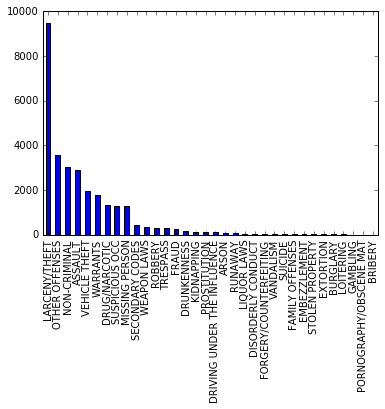

In [237]:
df['Category'].value_counts().plot(kind='bar')

In [256]:
category_larceny = df[df['Category']=='LARCENY/THEFT']

In [288]:
category_larceny_perdate = category_larceny['Date'].value_counts()

The graphic below shows the number of larceny per day. It is noted that the number of crimes  has been incresing in the last 3 months.

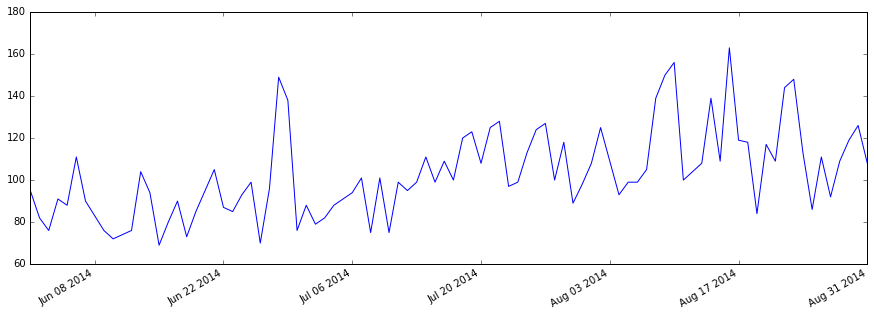

In [289]:
category_larceny_perdate.plot(figsize=(15,5))

In [290]:
crimes_peryearmonth= category_larceny_perdate.groupby([lambda x: x.year, lambda x: x.month])

The statistics below just confirm the tendency. The mean of larcenies has raised from 90.07 in June to 117.72 in August and the max number of crimes per month raised from 149 in June to 163 in August.

In [291]:
crimes_peryearmonth.describe()

2014  6  count     30.000000
         mean      90.066667
         std       18.203701
         min       69.000000
         25%       76.000000
         50%       87.500000
         75%       95.000000
         max      149.000000
      7  count     31.000000
         mean     101.774194
         std       15.154119
         min       75.000000
         25%       92.500000
         50%       99.000000
         75%      112.000000
         max      128.000000
      8  count     31.000000
         mean     116.419355
         std       20.477263
         min       84.000000
         25%      104.500000
         50%      109.000000
         75%      125.500000
         max      163.000000
dtype: float64

In [292]:
category_larceny_pertime = category_larceny['Time'].value_counts()

The crimes are commited mostly from 18:00 to 20:00.

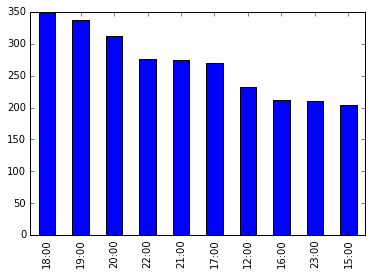

In [293]:
category_larceny_pertime[:10].plot(kind='bar')

In [294]:
category_larceny_perdayOfweek = category_larceny['DayOfWeek'].value_counts()

Crimes are more frequent on weekends.

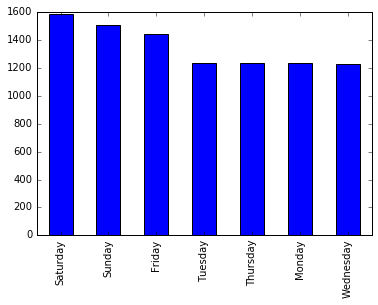

In [295]:
category_larceny_perdayOfweek.plot(kind = 'bar')

In [296]:
category_larceny_perpdDistrict = category_larceny['PdDistrict'].value_counts()

The most dangerous regionis the Southern district. 

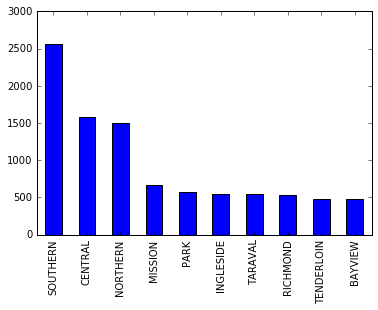

In [297]:
category_larceny_perpdDistrict.plot(kind = 'bar')